In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
data = pd.read_csv('owid-covid-data.csv')
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [5]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186630 entries, 0 to 186629
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    186630 non-null  object 
 1   continent                                   175764 non-null  object 
 2   location                                    186630 non-null  object 
 3   date                                        186630 non-null  object 
 4   total_cases                                 179253 non-null  float64
 5   new_cases                                   179005 non-null  float64
 6   new_cases_smoothed                          177836 non-null  float64
 7   total_deaths                                160909 non-null  float64
 8   new_deaths                                  160892 non-null  float64
 9   new_deaths_smoothed                         159735 non-null  float64
 

In [8]:
data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.792530e+05,1.790050e+05,1.778360e+05,1.609090e+05,160892.000000,159735.000000,178425.000000,178177.000000,177013.000000,160094.000000,...,116355.000000,114760.000000,75577.000000,136500.000000,174528.000000,149848.000000,6.417000e+03,6417.000000,6417.000000,6417.000000
mean,3.129942e+06,1.240509e+04,1.243998e+04,6.326290e+04,161.379174,162.354196,38800.908780,184.854139,183.843631,571.117762,...,10.646310,32.790162,50.940278,3.068859,73.649709,0.725290,3.937314e+04,9.683505,15.634208,1090.258014
std,1.960824e+07,8.794222e+04,8.635227e+04,3.301553e+05,799.998929,783.239477,72087.034136,913.440785,585.339504,855.376611,...,10.583434,13.527493,31.859790,2.519485,7.450848,0.149739,1.096858e+05,16.057381,29.134669,1545.291650
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1826.595723
25%,2.540000e+03,0.000000e+00,6.714000e+00,9.100000e+01,0.000000,0.143000,746.813000,0.000000,1.534000,22.074000,...,1.900000,21.600000,20.859000,1.300000,69.500000,0.602000,-2.150000e+01,-0.220000,-0.330000,-9.734468
50%,3.367000e+04,7.300000e+01,1.030000e+02,8.860000e+02,1.000000,2.143000,5957.017000,10.661000,19.174000,157.328500,...,6.300000,31.400000,49.839000,2.400000,75.050000,0.743000,3.898800e+03,6.460000,7.420000,548.924627
75%,3.629370e+05,1.048000e+03,1.155750e+03,8.238000e+03,18.000000,19.857000,48431.597000,102.751000,127.939000,816.164000,...,19.300000,41.300000,83.241000,4.000000,79.070000,0.845000,2.674380e+04,14.640000,21.890000,1754.244765
max,5.211275e+08,4.089134e+06,3.437066e+06,6.263321e+06,18124.000000,14782.429000,706541.904000,208049.887000,37617.428000,6385.394000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.213593e+06,111.010000,375.000000,9725.192865


In [9]:
data.shape

(186630, 67)

In [10]:
data['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [11]:
data['location'].nunique()

244

In [13]:
data_world = data[data['location'] == 'World']
data_world.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
183447,OWID_WRL,NaN,World,2020-01-22,557.0,0.0,NaN,17.0,0.0,NaN,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
183448,OWID_WRL,NaN,World,2020-01-23,657.0,100.0,NaN,18.0,1.0,NaN,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
183449,OWID_WRL,NaN,World,2020-01-24,944.0,287.0,NaN,26.0,8.0,NaN,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
183450,OWID_WRL,NaN,World,2020-01-25,1437.0,493.0,NaN,42.0,16.0,NaN,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
183451,OWID_WRL,NaN,World,2020-01-26,2120.0,683.0,NaN,56.0,14.0,NaN,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN


In [14]:
data_world.reset_index()

,index,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,183447,OWID_WRL,NaN,World,2020-01-22,557.0,0.0,NaN,17.0,0.0,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
1,183448,OWID_WRL,NaN,World,2020-01-23,657.0,100.0,NaN,18.0,1.0,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
2,183449,OWID_WRL,NaN,World,2020-01-24,944.0,287.0,NaN,26.0,8.0,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
3,183450,OWID_WRL,NaN,World,2020-01-25,1437.0,493.0,NaN,42.0,16.0,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
4,183451,OWID_WRL,NaN,World,2020-01-26,2120.0,683.0,NaN,56.0,14.0,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,184286,OWID_WRL,NaN,World,2022-05-10,518787504.0,731473.0,544509.429,6255765.0,2485.0,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
840,184287,OWID_WRL,NaN,World,2022-05-11,519481513.0,694009.0,555249.857,6258356.0,2591.0,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
841,184288,OWID_WRL,NaN,World,2022-05-12,520114085.0,632572.0,561323.286,6260299.0,1943.0,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
842,184289,OWID_WRL,NaN,World,2022-05-13,520663148.0,549063.0,550033.429,6262449.0,2150.0,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN


In [18]:
data_world[data_world['new_deaths'] == data_world['new_deaths'].max()]['date']

183811    2021-01-20
Name: date, dtype: object

In [20]:
data_world.loc[data_world['new_deaths'].idxmax()]['date']

'2021-01-20'

In [22]:
data_world.iloc[data_world['new_deaths'].argmax()]['date']

'2021-01-20'

In [23]:
data_world[data_world['date'] == data_world['date'].max()]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
184290,OWID_WRL,NaN,World,2022-05-14,521127460.0,464312.0,566941.571,6263321.0,875.0,1779.857,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN


In [24]:
data_world.tail(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
184290,OWID_WRL,NaN,World,2022-05-14,521127460.0,464312.0,566941.571,6263321.0,875.0,1779.857,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN


In [26]:
data_world_ratio = data_world['total_cases'].max() / data_world['population'].max()
data_world_ratio

0.06617520353323493

In [29]:
data_world_over_time = data_world.groupby('date')[['total_cases','new_cases','total_deaths','new_deaths']].sum().reset_index()
data_world_over_time

,date,total_cases,new_cases,total_deaths,new_deaths
0,2020-01-22,557.0,0.0,17.0,0.0
1,2020-01-23,657.0,100.0,18.0,1.0
2,2020-01-24,944.0,287.0,26.0,8.0
3,2020-01-25,1437.0,493.0,42.0,16.0
4,2020-01-26,2120.0,683.0,56.0,14.0
...,...,...,...,...,...
839,2022-05-10,518787504.0,731473.0,6255765.0,2485.0
840,2022-05-11,519481513.0,694009.0,6258356.0,2591.0
841,2022-05-12,520114085.0,632572.0,6260299.0,1943.0
842,2022-05-13,520663148.0,549063.0,6262449.0,2150.0


In [30]:
data_world_over_time['date'] = pd.to_datetime(data_world_over_time['date'])

In [31]:
data_world_over_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          844 non-null    datetime64[ns]
 1   total_cases   844 non-null    float64       
 2   new_cases     844 non-null    float64       
 3   total_deaths  844 non-null    float64       
 4   new_deaths    844 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 33.1 KB


Text(0.5, 1.0, 'Confirmed cases (total cases) all over the world')

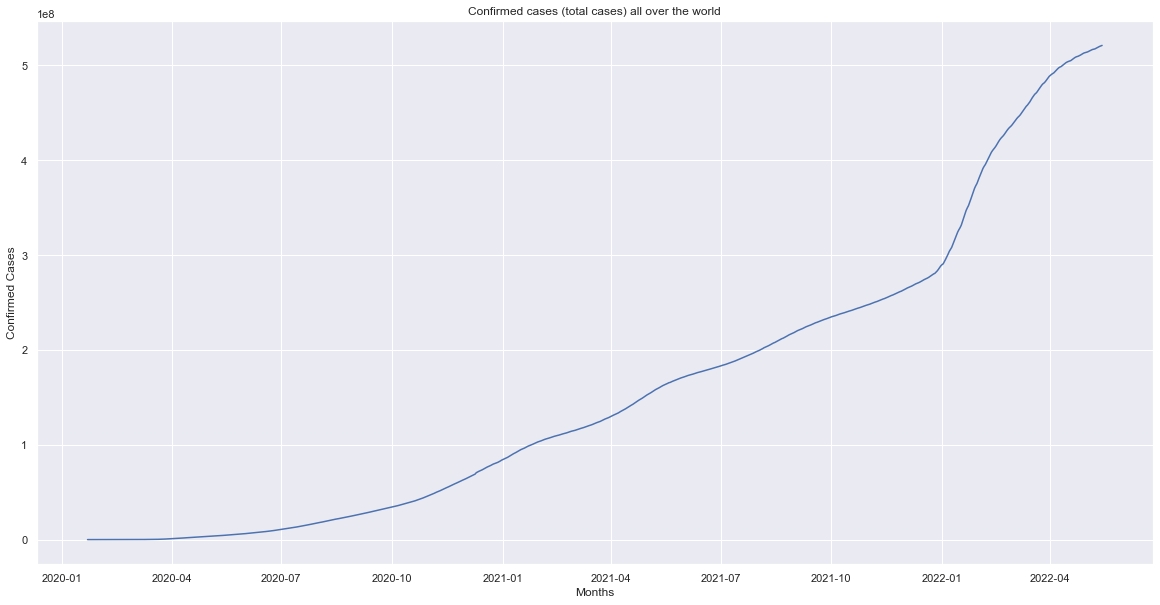

In [34]:
plt.figure(figsize=(20,10))
plt.plot(data_world_over_time['date'],data_world_over_time['total_cases'])
plt.xlabel('Months')
plt.ylabel('Confirmed Cases')
plt.title('Confirmed cases (total cases) all over the world')

Text(0.5, 1.0, 'Confirmed cases (total cases) all over the world')

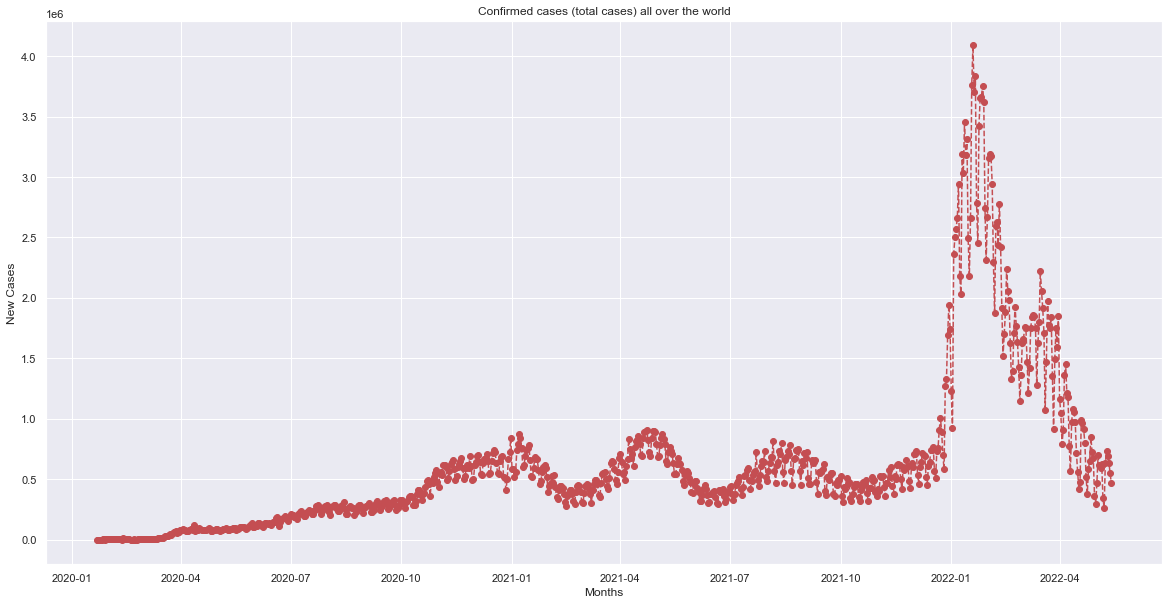

In [40]:
plt.figure(figsize=(20,10))
plt.plot(data_world_over_time['date'],data_world_over_time['new_cases'],marker='o',c='r',ls='--')
plt.xlabel('Months')
plt.ylabel('New Cases')
plt.title('Confirmed cases (total cases) all over the world')

Text(0.5, 1.0, 'Confirmed cases (total cases) all over the world')

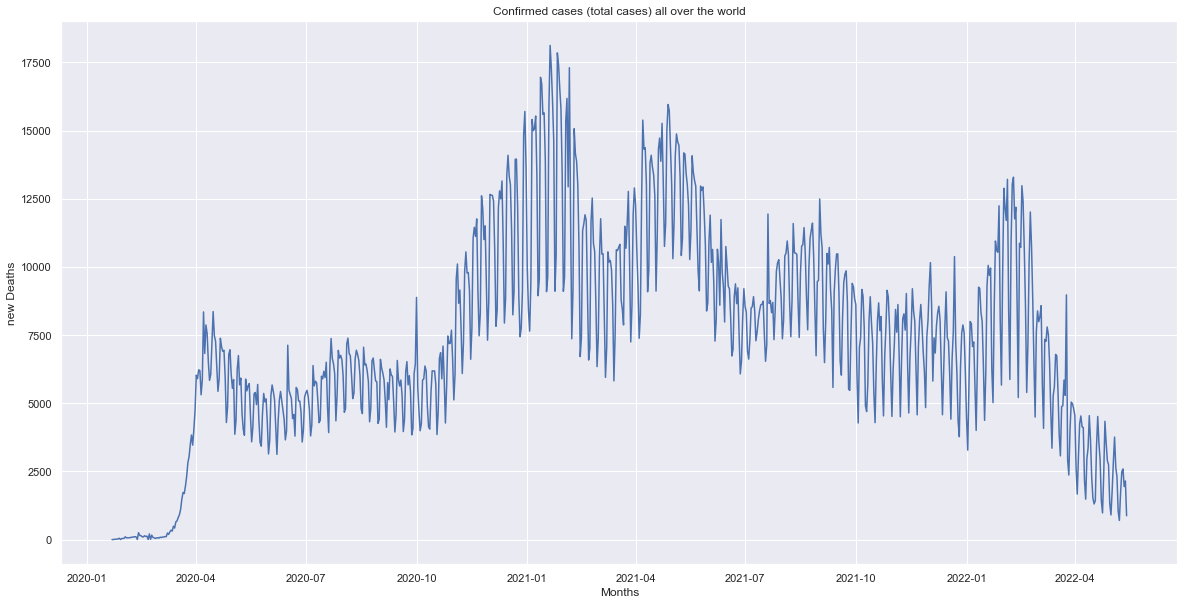

In [41]:
plt.figure(figsize=(20,10))
plt.plot(data_world_over_time['date'],data_world_over_time['new_deaths'])
plt.xlabel('Months')
plt.ylabel('new Deaths')
plt.title('Confirmed cases (total cases) all over the world')

Text(0.5, 1.0, 'Confirmed cases (total cases) all over the world')

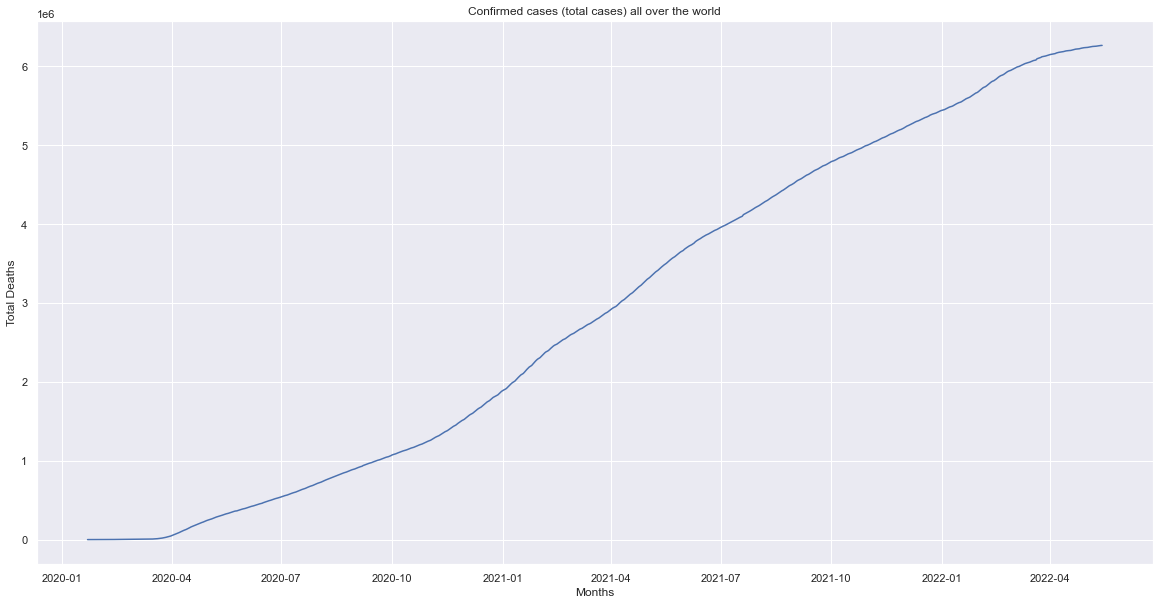

In [42]:
plt.figure(figsize=(20,10))
plt.plot(data_world_over_time['date'],data_world_over_time['total_deaths'])
plt.xlabel('Months')
plt.ylabel('Total Deaths')
plt.title('Confirmed cases (total cases) all over the world')

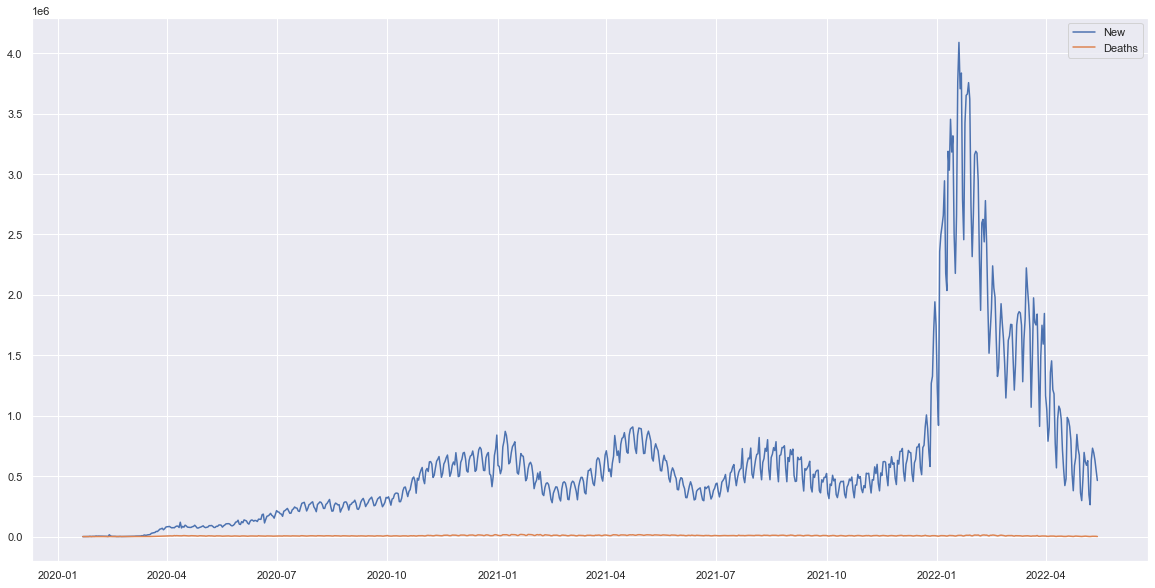

In [44]:
plt.figure(figsize=(20,10))
plt.plot(data_world_over_time['date'],data_world_over_time['new_cases'],label='New')
plt.plot(data_world_over_time['date'],data_world_over_time['new_deaths'],label='Deaths')
plt.legend()

In [46]:
data['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [48]:
data_egypt = data[data['location'] == 'Egypt']
data_egypt.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
48483,EGY,Africa,Egypt,2020-02-14,1.0,1.0,NaN,NaN,NaN,NaN,...,0.2,50.1,89.827,1.6,71.99,0.707,NaN,NaN,NaN,NaN
48484,EGY,Africa,Egypt,2020-02-15,1.0,0.0,NaN,NaN,NaN,NaN,...,0.2,50.1,89.827,1.6,71.99,0.707,NaN,NaN,NaN,NaN
48485,EGY,Africa,Egypt,2020-02-16,1.0,0.0,NaN,NaN,NaN,NaN,...,0.2,50.1,89.827,1.6,71.99,0.707,NaN,NaN,NaN,NaN
48486,EGY,Africa,Egypt,2020-02-17,1.0,0.0,NaN,NaN,NaN,NaN,...,0.2,50.1,89.827,1.6,71.99,0.707,NaN,NaN,NaN,NaN
48487,EGY,Africa,Egypt,2020-02-18,1.0,0.0,NaN,NaN,NaN,NaN,...,0.2,50.1,89.827,1.6,71.99,0.707,NaN,NaN,NaN,NaN


In [50]:
data_egypt.reset_index(drop=True,inplace=True)

In [51]:
data_egypt.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,EGY,Africa,Egypt,2020-02-14,1.0,1.0,NaN,NaN,NaN,NaN,...,0.2,50.1,89.827,1.6,71.99,0.707,NaN,NaN,NaN,NaN
1,EGY,Africa,Egypt,2020-02-15,1.0,0.0,NaN,NaN,NaN,NaN,...,0.2,50.1,89.827,1.6,71.99,0.707,NaN,NaN,NaN,NaN
2,EGY,Africa,Egypt,2020-02-16,1.0,0.0,NaN,NaN,NaN,NaN,...,0.2,50.1,89.827,1.6,71.99,0.707,NaN,NaN,NaN,NaN
3,EGY,Africa,Egypt,2020-02-17,1.0,0.0,NaN,NaN,NaN,NaN,...,0.2,50.1,89.827,1.6,71.99,0.707,NaN,NaN,NaN,NaN
4,EGY,Africa,Egypt,2020-02-18,1.0,0.0,NaN,NaN,NaN,NaN,...,0.2,50.1,89.827,1.6,71.99,0.707,NaN,NaN,NaN,NaN


In [52]:
data_egypt_recent = data_egypt[data_egypt['date'] == data_egypt['date'].max()]

In [53]:
data_egypt_recent

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
820,EGY,Africa,Egypt,2022-05-14,515645.0,0.0,0.0,24669.0,NaN,NaN,...,0.2,50.1,89.827,1.6,71.99,0.707,NaN,NaN,NaN,NaN


In [55]:
data_egypt_recent = data_egypt_recent[['date','total_cases','new_cases','total_deaths','new_deaths']]
data_egypt_recent.reset_index(drop=True)

,date,total_cases,new_cases,total_deaths,new_deaths
0,2022-05-14,515645.0,0.0,24669.0,NaN


In [57]:
data_egypt[['total_cases','new_cases','total_deaths','new_deaths']].max()

total_cases     515645.0
new_cases         5516.0
total_deaths     24669.0
new_deaths         132.0
dtype: float64

In [58]:
data_egypt.loc[data_egypt['total_deaths'].idxmax()]['date']

'2022-05-09'

In [60]:
data_egypt[data_egypt['new_deaths'] == data_egypt['new_deaths'].max()]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
640,EGY,Africa,Egypt,2021-11-15,344907.0,1881.0,927.571,19567.0,132.0,62.429,...,0.2,50.1,89.827,1.6,71.99,0.707,NaN,NaN,NaN,NaN


In [76]:
data_eg_jan = data_egypt[['date','new_cases']]

In [77]:
data_eg_jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       821 non-null    object 
 1   new_cases  821 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.0+ KB


In [78]:
data_eg_jan['date'] = pd.to_datetime(data_eg_jan['date'])

C:\Users\Mohamed\AppData\Local\Temp/ipykernel_7112/1501158971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_eg_jan['date'] = pd.to_datetime(data_eg_jan['date'])


In [79]:
data_eg_jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       821 non-null    datetime64[ns]
 1   new_cases  821 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.0 KB


In [80]:
data_eg_jan

,date,new_cases
0,2020-02-14,1.0
1,2020-02-15,0.0
2,2020-02-16,0.0
3,2020-02-17,0.0
4,2020-02-18,0.0
...,...,...
816,2022-05-10,0.0
817,2022-05-11,0.0
818,2022-05-12,0.0
819,2022-05-13,0.0


In [81]:
data_eg_jan21 = data_eg_jan[(data_eg_jan['date'] >= '2021-01-01') & (data_eg_jan['date'] <= '2021-01-31')]
data_eg_jan21

,date,new_cases
322,2021-01-01,1409.0
323,2021-01-02,1407.0
324,2021-01-03,1309.0
325,2021-01-04,1277.0
326,2021-01-05,1119.0
327,2021-01-06,1007.0
328,2021-01-07,1219.0
329,2021-01-08,1001.0
330,2021-01-09,989.0
331,2021-01-10,993.0


In [84]:
data_egypt.groupby(data_egypt['date'].dt.month).sum()

AttributeError: Can only use .dt accessor with datetimelike values